<a href="https://colab.research.google.com/github/djbradyAtOpticalSciencesArizona/computationalImaging/blob/master/waves/hioPhaseRetrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hybrid Input Output Phase Retrieval
## David Brady
## University of Arizona
## October 2021

This notebook considers recovery of nonnegative real-valued objects from the magnitude of their Fourier transformation using Fienup's hybrid input output algorithm

## libraries

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import skimage
from tensorflow.keras.datasets import mnist
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
from google.colab import files




#### training and validation images

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

11501568/11490434 [==============================] - 0s 0us/step


## Hybrid input output recovery

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

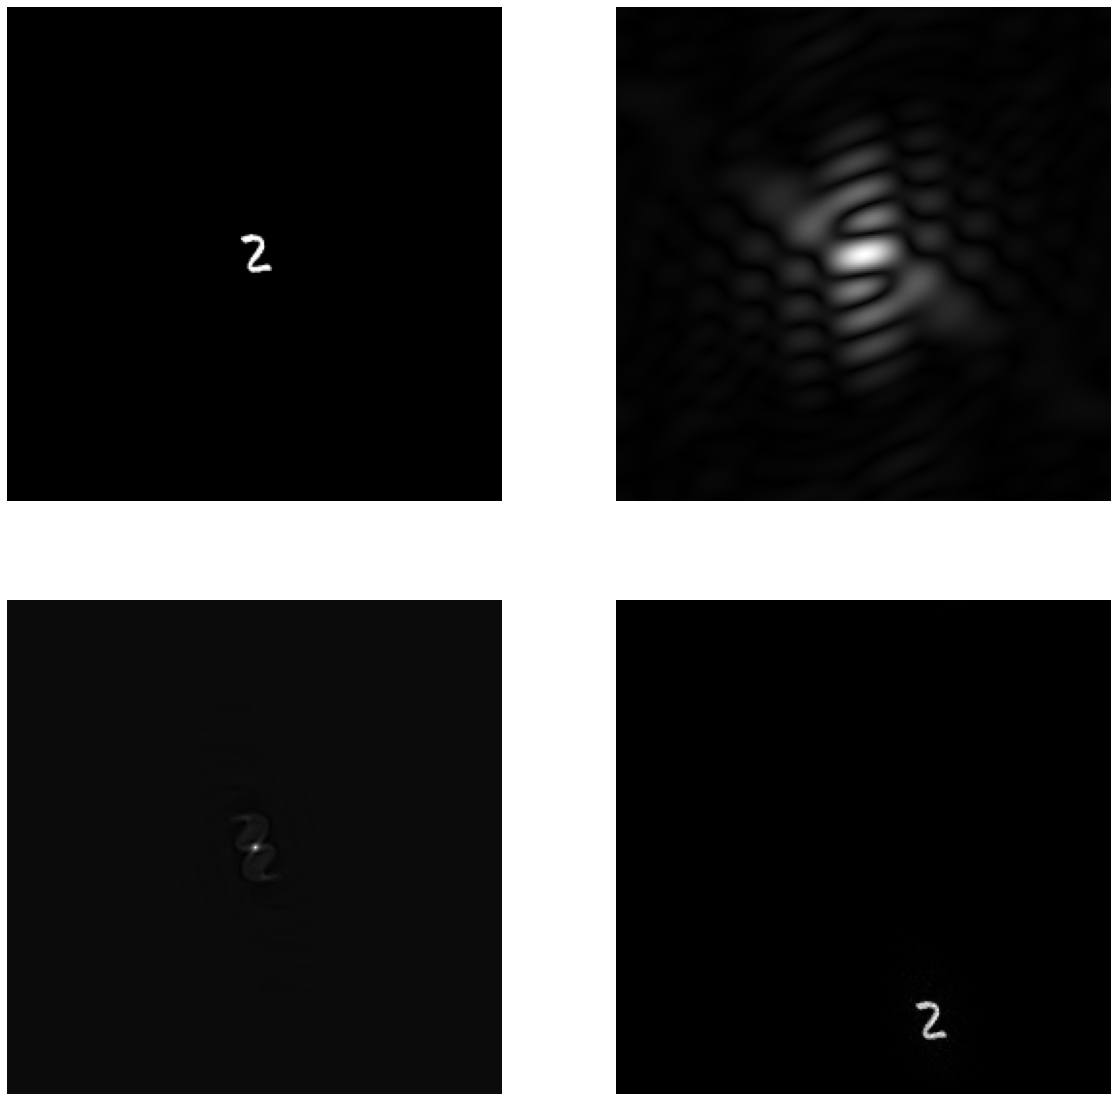

In [55]:
# number of iterations and value of beta
iterations=200
beta=0.8
# input image field
im=x_test[1036,:,:]
f=np.pad(im,np.int((256-im.shape[0])/2))
hatf=np.abs(np.fft.fft2(f))
#
# initalize phase of hat f
#
hatPhi=2*np.pi*np.random.random(hatf.shape)
fest=np.zeros(np.shape(f))
for pop in range(iterations):
  tf=np.real(np.fft.ifft2(hatf*np.exp(1j*hatPhi)))
  tfL=np.ndarray.flatten(tf)
  pf=np.ndarray.flatten(fest)
  for pip in range(len(tfL)):
    if tfL[pip]<0:
      pf[pip]=pf[pip]-beta*tfL[pip]
    else:
      pf[pip]=tfL[pip]
  fest=np.reshape(pf,np.shape(f))
  hatPhi=np.angle(np.fft.fft2(fest))
plt.subplot(2,2,1)
plt.imshow(f, cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(np.fft.fftshift(hatf), cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(np.real(np.fft.fftshift(np.fft.ifft2(hatf))), cmap='gray', aspect='equal')
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(fest, cmap='gray', aspect='equal')
plt.axis('off')
plt.savefig('hio.pdf')
files.download('hio.pdf')

